In [1]:

import matplotlib.pyplot as plt
import numpy as np
import xlrd
from arch.bootstrap import SPA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model

In [2]:
def extreme_strategy_3(closing_prices, mid_band, lower_band, upper_band, stop_loss = 0.1):
    profit = 0
    buy_signal = []
    sell_signal = []
    position = None  # None means no position, 'long' means holding a long position
    entry_price = 0
    stop_loss_price = 0
    profit_ts = []
    for i in range(closing_prices.shape[0]):
        if position is None:
            if closing_prices[i] < lower_band[i]:
                position = 'long'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 - stop_loss)/ 100
                buy_signal.append(i)
            elif closing_prices[i] > upper_band[i]:
                position = 'short'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 + stop_loss)/ 100
                sell_signal.append(i)
        elif position == 'long':
            if closing_prices[i] > upper_band[i]:
                profit += closing_prices[i] - entry_price
                position = None
                sell_signal.append(i)
            elif closing_prices[i] < stop_loss_price :
                profit -= entry_price - closing_prices[i]
                position = None
                sell_signal.append(i)
        elif position == 'short':
            if closing_prices[i] < lower_band[i]:
                profit += entry_price - closing_prices[i]
                position = None
                buy_signal.append(i)
            elif closing_prices[i] > stop_loss_price :
                profit -= closing_prices[i] - entry_price
                position = None
                buy_signal.append(i)

        profit_ts.append(profit)
    # return profit_ts, buy_signal, sell_signal
    return profit_ts

def extreme_strategy_4(closing_prices, mid_band, lower_band, upper_band, stop_loss = 0.1):
    profit = 0
    buy_signal = []
    sell_signal = []
    position = None  # None means no position, 'long' means holding a long position
    entry_price = 0
    stop_loss_price = 0
    profit_ts = []
    for i in range(closing_prices.shape[0]):
        if position is None:
            if closing_prices[i] < lower_band[i]:
                position = 'long'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 - stop_loss)/ 100
                buy_signal.append(i)
            elif closing_prices[i] > upper_band[i]:
                position = 'short'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 + stop_loss)/ 100
                sell_signal.append(i)
        elif position == 'long':
            if closing_prices[i] > upper_band[i]:
                profit += closing_prices[i] - entry_price
                position = None
                sell_signal.append(i)
            elif closing_prices[i] < stop_loss_price and closing_prices[i] < lower_band[i]:
                profit -= entry_price - closing_prices[i]
                position = None
                sell_signal.append(i)
        elif position == 'short':
            if closing_prices[i] < lower_band[i]:
                profit += entry_price - closing_prices[i]
                position = None
                buy_signal.append(i)
            elif closing_prices[i] > stop_loss_price and closing_prices[i] > upper_band[i]:
                profit -= closing_prices[i] - entry_price
                position = None
                buy_signal.append(i)

        profit_ts.append(profit)
    # return profit_ts, buy_signal, sell_signal
    return profit_ts

def normal_strategy_2(closing_prices, mid_band, lower_band, upper_band, stop_loss = 0.1):
    
    profit = 0
    buy_signal = []
    sell_signal = []
    position = None  # None means no position, 'long' means holding a long position
    entry_price = 0
    stop_loss_price = 0
    profit_ts = []
    for i in range(closing_prices.shape[0]):
        if position is None:
            if closing_prices[i] < lower_band[i]:
                position = 'long'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 - stop_loss)/ 100
                buy_signal.append(i)
            elif closing_prices[i] > upper_band[i]:
                position = 'short'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 + stop_loss)/ 100
                sell_signal.append(i)
        elif position == 'long':
            if closing_prices[i] > mid_band[i]:
                profit += closing_prices[i] - entry_price
                position = None
                sell_signal.append(i)
            elif closing_prices[i] < stop_loss_price and closing_prices[i] < lower_band[i]:
                profit -= entry_price - closing_prices[i]
                position = None
                sell_signal.append(i)
        elif position == 'short':
            if closing_prices[i] < mid_band[i]:
                profit += entry_price - closing_prices[i]
                position = None
                buy_signal.append(i)
            elif closing_prices[i] > stop_loss_price and closing_prices[i] > upper_band[i]:
                profit -= closing_prices[i] - entry_price
                position = None
                buy_signal.append(i)

        profit_ts.append(profit)
    # return profit_ts, buy_signal, sell_signal
    return profit_ts

def normal_strategy_1(closing_prices, mid_band, lower_band, upper_band, stop_loss = 0.1):
    
    profit = 0
    buy_signal = []
    sell_signal = []
    position = None  # None means no position, 'long' means holding a long position
    entry_price = 0
    stop_loss_price = 0
    profit_ts = []
    for i in range(closing_prices.shape[0]):
        if position is None:
            if closing_prices[i] < lower_band[i]:
                position = 'long'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 - stop_loss)/ 100
                buy_signal.append(i)
            elif closing_prices[i] > upper_band[i]:
                position = 'short'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 + stop_loss)/ 100
                sell_signal.append(i)
        elif position == 'long':
            if closing_prices[i] > mid_band[i]:
                profit += closing_prices[i] - entry_price
                position = None
                sell_signal.append(i)
            elif closing_prices[i] < stop_loss_price :
                profit -= entry_price - closing_prices[i]
                position = None
                sell_signal.append(i)
        elif position == 'short':
            if closing_prices[i] < mid_band[i]:
                profit += entry_price - closing_prices[i]
                position = None
                buy_signal.append(i)
            elif closing_prices[i] > stop_loss_price :
                profit -= closing_prices[i] - entry_price
                position = None
                buy_signal.append(i)

        profit_ts.append(profit)
    # return profit_ts, buy_signal, sell_signal
    return profit_ts


In [ ]:
df = pd.read_csv('/home/vishi/bolinger/mid_vol.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('DateTime', inplace=True)

window = 20
df['rolling_avg_20'] = df['close'].rolling(window=window).mean().round(2)
df['rolling_sd_20'] = df['close'].rolling(window=window).std().round(2)
df.head()

,open,high,low,close,close_scaled_down,arima_predictions,garch_vol_predictions,rolling_avg_20,rolling_sd_20
DateTime,,,,,,,,,
2024-12-31 09:16:00,2355950,2356430,2354005,2355135,235.5135,NaN,NaN,NaN,NaN
2024-12-31 09:17:00,2355070,2356150,2354500,2355915,235.5915,NaN,NaN,NaN,NaN
2024-12-31 09:18:00,2355980,2356025,2355100,2355405,235.5405,NaN,NaN,NaN,NaN
2024-12-31 09:19:00,2355400,2357195,2355215,2356905,235.6905,NaN,NaN,NaN,NaN
2024-12-31 09:20:00,2356960,2357015,2355475,2355475,235.5475,NaN,NaN,NaN,NaN


In [9]:
mid_band = np.array(df['rolling_avg_20'])[20:]
upper_band = mid_band + 2 * np.array(df['rolling_sd_20'])[20:]
lower_band = mid_band - 2 * np.array(df['rolling_sd_20'])[20:]
close_band = np.array(df['close'])[20:]

profit_n_baseline = normal_strategy_1(close_band, mid_band, lower_band, upper_band, stop_loss=100)
profit_n_1 = normal_strategy_1(close_band, mid_band, lower_band, upper_band, stop_loss=0.1)
profit_n_2 = normal_strategy_2(close_band, mid_band, lower_band, upper_band, stop_loss=0.1)
profit_e_baseline = extreme_strategy_3(close_band, mid_band, lower_band, upper_band, stop_loss=100)
profit_e_1 = extreme_strategy_3(close_band, mid_band, lower_band, upper_band, stop_loss=0.1)
profit_e_2 = extreme_strategy_4(close_band, mid_band, lower_band, upper_band, stop_loss=0.1)    


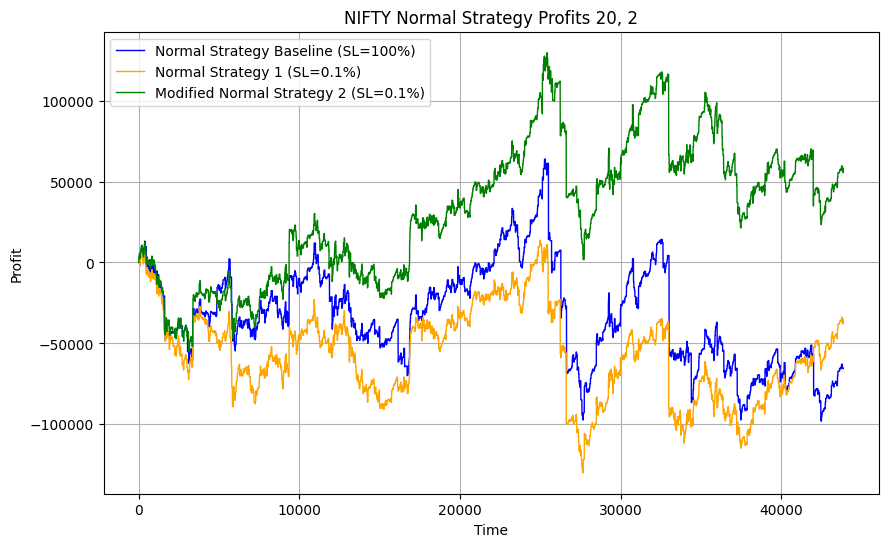

In [13]:
# plot n_baseline,n1,n2
plt.figure(figsize=(10, 6))
plt.plot(profit_n_baseline, label='Normal Strategy Baseline (SL=100%)', color='blue',linewidth=1)
plt.plot(profit_n_1, label='Normal Strategy 1 (SL=0.1%)', color='orange',linewidth=1)
plt.plot(profit_n_2, label='Modified Normal Strategy 2 (SL=0.1%)', color='green',linewidth=1)
plt.title('NIFTY Normal Strategy Profits 20, 2')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

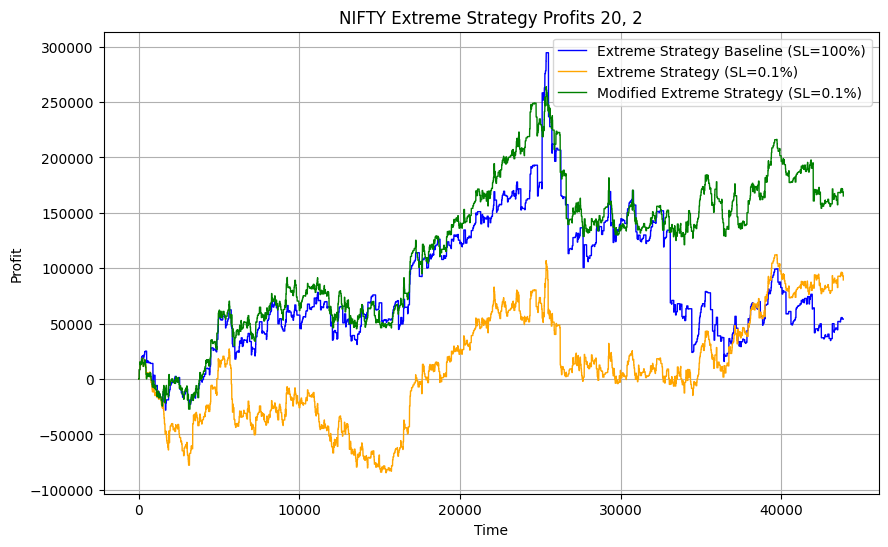

In [14]:
# plot e_baseline,e1,e2
plt.figure(figsize=(10, 6))
plt.plot(profit_e_baseline, label='Extreme Strategy Baseline (SL=100%)', color='blue', linewidth=1)
plt.plot(profit_e_1, label='Extreme Strategy (SL=0.1%)', color='orange',linewidth=1)
plt.plot(profit_e_2, label='Modified Extreme Strategy (SL=0.1%)', color='green',linewidth=1)
plt.title('NIFTY Extreme Strategy Profits 20, 2')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

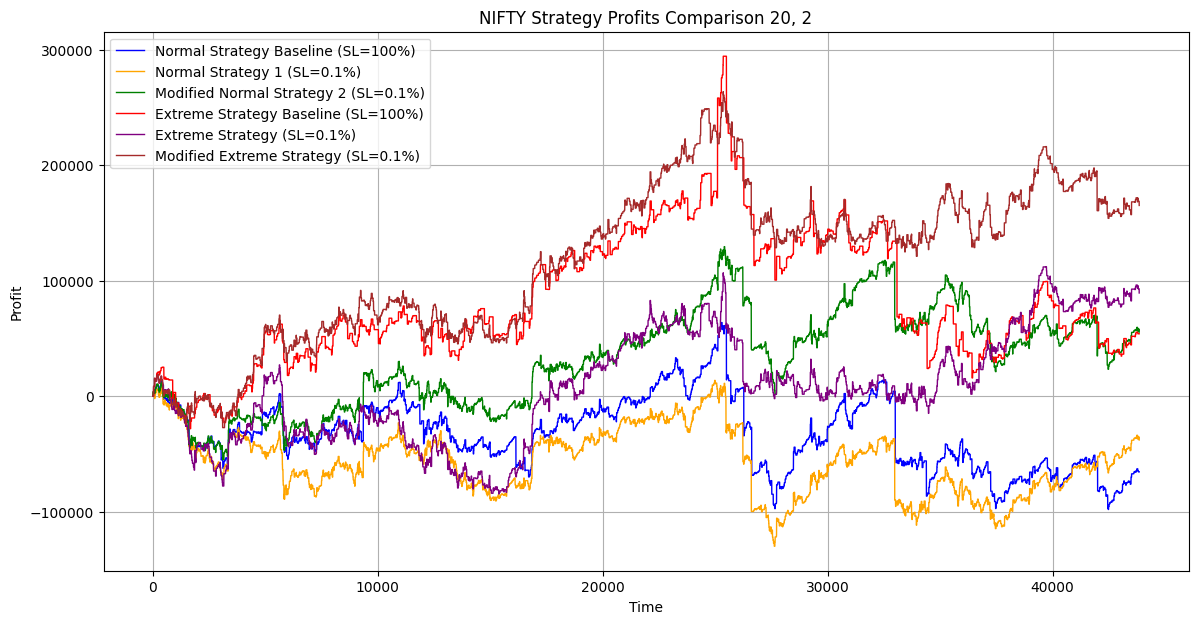

In [15]:
# plot everything together
plt.figure(figsize=(14, 7))
plt.plot(profit_n_baseline, label='Normal Strategy Baseline (SL=100%)', color='blue', linewidth=1)
plt.plot(profit_n_1, label='Normal Strategy 1 (SL=0.1%)', color='orange',linewidth=1)
plt.plot(profit_n_2, label='Modified Normal Strategy 2 (SL=0.1%)', color='green',linewidth=1)
plt.plot(profit_e_baseline, label='Extreme Strategy Baseline (SL=100%)', color='red',linewidth=1)
plt.plot(profit_e_1, label='Extreme Strategy (SL=0.1%)', color='purple',linewidth=1)
plt.plot(profit_e_2, label='Modified Extreme Strategy (SL=0.1%)', color='brown',linewidth=1)
plt.title('NIFTY Strategy Profits Comparison 20, 2')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()